In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header = None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)

In [3]:
df_train.shape

(60000, 785)

In [4]:
df_test.shape

(10000, 785)

In [27]:
X_train = df_train.values[:,1:]
X_test = df_test.values[:,1:]
y_train = df_train.values[:,0]
y_test = df_test.values[:,0]

In [6]:
X_train[0].shape

(784,)

In [7]:
28 * 28

784

In [8]:
X_train[0].reshape((28, 28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
import matplotlib.pyplot as plt

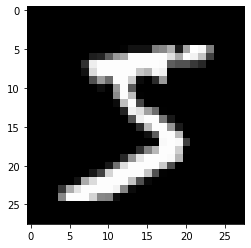

In [11]:
plt.imshow(X_train[0].reshape((28,28)), cmap = "gray")

In [18]:
import numpy as np

In [19]:
(X_train == 0).sum()/np.product(X_train.shape)

0.8087977040816327

In [16]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

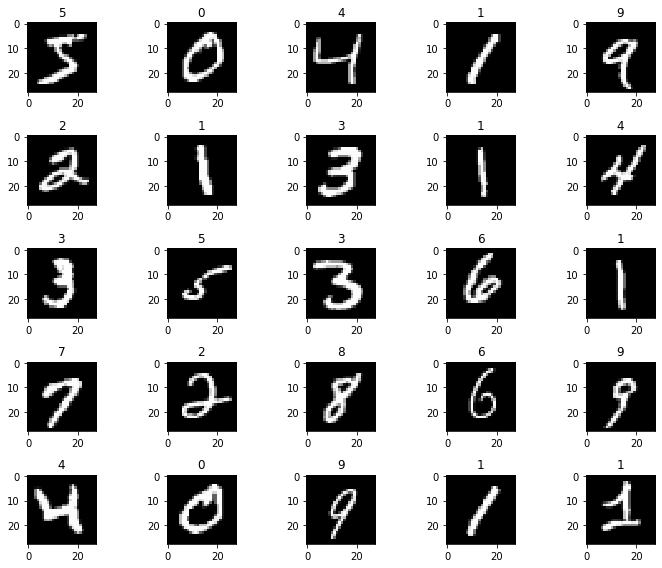

In [22]:
fig, axes = plt.subplots(5,5, figsize = (10, 8))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28,28)), cmap = "gray")
    ax.set_title(y_train[i])
plt.tight_layout()

In [24]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X

In [23]:
from sklearn import *

In [25]:
%%time 

est = linear_model.SGDClassifier(n_jobs=8, tol=1e-5, eta0 = 0.15,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)

est.fit(X_train_scaled, y_train)

CPU times: user 36.6 s, sys: 185 ms, total: 36.8 s
Wall time: 6.95 s


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.15, fit_intercept=True,
              l1_ratio=0.15, learning_rate='invscaling', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=8, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=1e-05,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
est.score(X_test_scaled, y_test)

0.9083

In [49]:
import keras
from time import time

In [36]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [52]:
now = int(time())
f"/tmp/tf/{now}"

'/tmp/tf/1571996121'

In [58]:
now = int(time())
tensorboard = keras.callbacks.TensorBoard(log_dir = f"/tmp/tf/{now}")
model = keras.Sequential()

sgd = keras.optimizers.SGD(lr = 0.015)

model.add(keras.layers.InputLayer(input_shape = (784,)))
model.add(keras.layers.Dense(units = 400, activation = "relu"))
model.add(keras.layers.Dense(units = 100, activation = "relu"))
model.add(keras.layers.Dense(units = 10, activation = "softmax"))

model.summary()

model.compile(optimizer = sgd
            , loss = keras.losses.categorical_crossentropy
            , metrics = ["acc"])


model.fit(X_train_scaled, Y_train, epochs = 20, validation_data = (X_test, Y_test)
    , batch_size = 64, verbose = 1, callbacks = [tensorboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.6577 - acc: 0.8361 - val_loss: 1.5807 - val_acc: 0.8995
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3047 - acc: 0.9139 - val_loss: 1.2341 - val_acc: 0.9216
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - los

In [42]:
np.log(0.8)

-0.2231435513142097